### Python Operator Overloading
Python operators work for built-in classes. But the same operator behaves differently with different types. For example, the + operator will perform arithmetic addition on two numbers, merge two lists, or concatenate two strings.

This feature in Python that allows the same operator to have different meaning according to the context is called operator overloading.

So what happens when we use them with objects of a user-defined class? Let us consider the following class, which tries to simulate a point in 2-D coordinate system.

In [1]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y


p1 = Point(1, 2)
p2 = Point(2, 3)
print(p1+p2)

TypeError: ignored

Python Special Functions
Class functions that begin with double underscore __ are called special functions in Python.

These functions are not the typical functions that we define for a class. The __init__() function we defined above is one of them. It gets called every time we create a new object of that class.

There are numerous other special functions in Python. Visit Python Special Functions to learn more about them.

Using special functions, we can make our class compatible with built-in functions.

In [2]:
p1 = Point(2,3)
print(p1)

Suppose we want the print() function to print the coordinates of the Point object instead of what we got. We can define a __str__() method in our class that controls how the object gets printed. Let's look at how we can achieve this:



In [3]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    
    def __str__(self):
        return "({0},{1})".format(self.x,self.y)

Now let's try the print() function again.



In [4]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __str__(self):
        return "({0}, {1})".format(self.x, self.y)


p1 = Point(2, 3)
print(p1)

(2, 3)


That's better. Turns out, that this same method is invoked when we use the built-in function str() or format().



In [5]:
str(p1)

'(2, 3)'

In [6]:
format(p1)

'(2, 3)'

So, when you use str(p1) or format(p1), Python internally calls the p1.__str__() method. Hence the name, special functions.

Now let's go back to operator overloading.

### Overloading the + Operator


To overload the + operator, we will need to implement __add__() function in the class. With great power comes great responsibility. We can do whatever we like, inside this function. But it is more sensible to return a Point object of the coordinate sum.



In [8]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __str__(self):
        return "({0},{1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)

In [9]:
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __str__(self):
        return "({0},{1})".format(self.x, self.y)

    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)


p1 = Point(1, 2)
p2 = Point(2, 3)

print(p1+p2)

(3,5)


What actually happens is that, when you use p1 + p2, Python calls p1.__add__(p2) which in turn is Point.__add__(p1,p2). After this, the addition operation is carried out the way we specified.

Similarly, we can overload other operators as well. The special function that we need to implement is tabulated below.

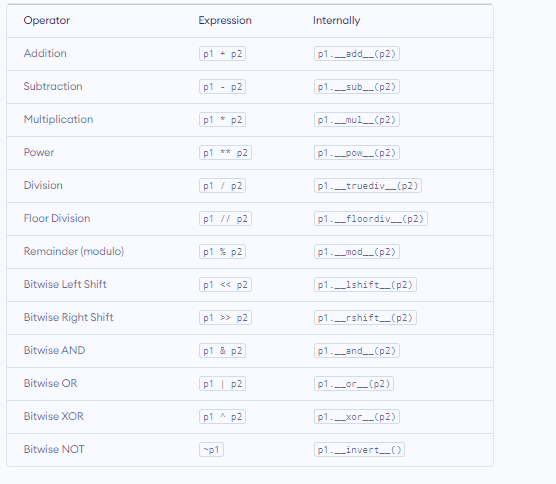

### Overloading Comparison Operators


Python does not limit operator overloading to arithmetic operators only. We can overload comparison operators as well.

Suppose we wanted to implement the less than symbol < symbol in our Point class.

Let us compare the magnitude of these points from the origin and return the result for this purpose. It can be implemented as follows.

In [10]:
# overloading the less than operator
class Point:
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

    def __str__(self):
        return "({0},{1})".format(self.x, self.y)

    def __lt__(self, other):
        self_mag = (self.x ** 2) + (self.y ** 2)
        other_mag = (other.x ** 2) + (other.y ** 2)
        return self_mag < other_mag

p1 = Point(1,1)
p2 = Point(-2,-3)
p3 = Point(1,-1)

# use less than
print(p1<p2)
print(p2<p3)
print(p1<p3)

True
False
False


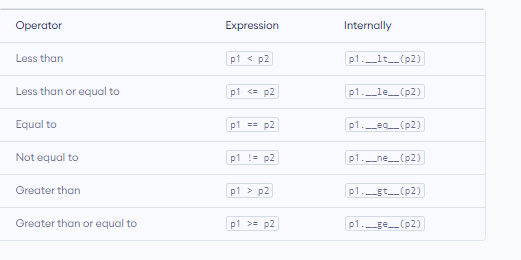